# Błedy i arytmetyka zmiennopozycyjna

Całość kodu można znaleźć w formie online pod linkiem [https://github.com/KsawerySmoczynski/elementy-metod-numerycznych](https://github.com/KsawerySmoczynski/elementy-metod-numerycznych).
Jest on również dostępny w google collab

In [ ]:
# Żeby odpalić notebook na google colab będziemy musieli zainstalować potrzebne pakiety
import subprocess
import sys
import os

REQUIRED_PACKAGES = ["numpy", "matplotlib", "sympy"]
RUN_IN_COLAB = "COLAB_JUPYTER_IP" in os.environ

def install(packages):
    subprocess.check_call([sys.executable, "-m", "pip", "install", *packages])

if RUN_IN_COLAB:
    install(REQUIRED_PACKAGES)

## Zadania
### Zadanie1 
Oblicz:
* $(0.1+0.2)+0.3$ oraz $0.1+(0.2+0.3)$
* $(0.1*0.6)*0.7$ oraz $0.1*(0.6*0.7)$,
* $0.1*(0.7-0.6)$ oraz $0.1*0.7-0.1*0.6$

Porównaj otrzymane wyniki.

In [1]:
a = (.1 + .2) + .3 
b = .1 + (.2 +.3)
a == b, a, b

(False, 0.6000000000000001, 0.6)

In [2]:
a = (.1 * .6) * .7
b = .1 + (.6 * .7)
a == b, a, b

(False, 0.041999999999999996, 0.52)

In [3]:
a = .1 * (.7 - .6)
b = .1 * .7 - .1 * .6
a == b, a, b

(False, 0.009999999999999998, 0.009999999999999995)

### Zadanie 2
Niech $a=1+eps,b=1+\frac{eps}{2}$. 

Które z tych liczb są równe $1$ w arytmetyce zmiennopozycyjnej? 

Czy liczby $a-1$ i $b-1$ są równe $0$? Czy $\frac{eps}{2}=0$?

Najpierw uzyskajmy epsilon maszynowy:

In [8]:
def machineEpsilon(func=float):
    machine_epsilon = func(1)
    ONE = func(1)
    while ONE+machine_epsilon != ONE:
        machine_epsilon_last = machine_epsilon
        machine_epsilon = func(machine_epsilon) / func(2)
    return machine_epsilon_last

machineEpsilon(float)

2.220446049250313e-16

In [9]:
import sys
sys.float_info.epsilon

2.220446049250313e-16

Jak widać uzyskany przez nas epsilon jest równy temu z informacji systemowej

In [10]:
import numpy as np

np.finfo(np.float64).eps

2.220446049250313e-16

Który jest równy temu zapenianemu przez pakiet do obliczeń numerycznych na wektorach - `numpy`

In [11]:
machine_eps = np.finfo(np.float64).eps

a = 1. + machine_eps
b = 1. + machine_eps / 2

In [12]:
a == 1, b == 1

(False, True)

Odpowiedź: Tylko druga liczba (`b`) jest równa 1 w arytmetyce zmiennopozycyjnej.

In [13]:
a - 1 == 0, b - 1 == 0

(False, True)

Odpowiedź: Odpowiednio $a - 1 \neq 0$ oraz $b - 1 = 0$

In [14]:
machine_eps / 2 == 0

False

Odpowiedź: Nie ponieważ epsilon maszynowy nie jest najmniejszą dodatnią reprezentowalną liczbą w systemie 32 bitowym, tylko różnicą między najbliższą reprezentowalną liczbą względem jedynki, a jedynką.

### Zadanie 3
Napisz skrypt zliczający sumę argumentów $0.1$ do momentu, gdy otrzymana wartość wyniesie $2$. Wykorzystaj pętlę while i dwa różne warunki stopu:

1. $while \; suma<>2$,
2. $ while \; abs(suma-2)>0.001$.

Czy w obu przypadkach otrzymamy to samo?

In [15]:
# Uwaga pętla nieskończona
suma_1 = .1
while suma_1 != 2:
    suma_1 += .1

In [16]:
suma_2 = .1
while abs(suma_2 - 2) > .001:
    suma_2 += .1
suma_2

2.0000000000000004

Odpowiedź: Nie otrzymamy tego samego ponieważ `suma_1` nigdy nie będzie równać się dokładnie 2 w związku z czym pierwsza pętla nigdy nie zakończy swojego działania.

### Zadanie 4
Zdefinujmy ciąg całek wzorem 
$$y_n=\int^1_0 \frac{x^n}{x+5} dx$$
Ciąg ten spełnia zależność rekurencyjną $y_n+5y_{n-1}=\frac{1}{n}$. Korzystając z tej zależności chcemy obliczyć wartości poszczególnych całek.

1. Napisz skrypt, który oblicza przybliżone wartości całek $y_1,\ldots,y_8$, wykorzystując wzór rekurencyjny $y_n=\frac{1}{n}-5y_{n-1}$ oraz początkowe przybliżenie całki $y_0\approx0.182$.
2. Napisz skrypt, który oblicza przybliżone wartości całek $y_7,\ldots,y_0$, wykorzystując wzór rekurencyjny $y_{n-1}=\frac{1}{5n}-\frac{1}{5}y_n$oraz początkowe przybliżenie całki  $y_8\approx 0.019$.
3. Porównaj otrzymane w powyższych punktach wyniki i spróbuj wyjaśnić powstałe różnice.

#### 1.

In [17]:
# Sekwencyjna wersja
y_0 = 0.128
y = [y_0]
n = 9
for i in range(1, n):
    n_i = i+1
    y_n = 1/n_i - 5*y[n_i-2] # listy są indeksowane od 0 dlatego odejmujemy 2, a nie 1
    y.append(y_n)
y

[0.128,
 -0.14,
 1.0333333333333334,
 -4.916666666666667,
 24.783333333333335,
 -123.75,
 618.8928571428571,
 -3094.3392857142853,
 15471.807539682539]

In [10]:
# Wersja rekurencyjna
from functools import lru_cache # Żeby nie przeliczać od nowa wartości dla tych samych wyrazów użyjemy cacheowania
# w ten sposób po przeliczeniu dla n-tego wyrazu zapamiętujemy jego wartości i odczytujemy z pamięci dla n+1 wyrazu
# nie wpływa to na wyniki tylko czas wykonywania algorytmu

@lru_cache
def y_n(n):
    if n == 1:
        return 0.128
    else:
        return 1/n - 5*y_n(n-1)

In [11]:
n = 9

y = []
for i in range(0,n):
    n_i = i+1
    y.append(y_n(n_i))   
y

[0.128,
 -0.14,
 1.0333333333333334,
 -4.916666666666667,
 24.783333333333335,
 -123.75,
 618.8928571428571,
 -3094.3392857142853,
 15471.807539682539]

#### 2.

In [13]:
@lru_cache
def y_n(n):
    if n == 9:
        return 0.019
    elif n < 9:
        return 1/(5*n) - (1/5 * y_n(n+1))
    else:
        raise NotImplementedError("Algorithm defined up to 9th term")

In [14]:
y = []
n = 9
while n >= 1:
    y.append(y_n(n))
    n -= 1

list(reversed(y))

[0.1823215572114286,
 0.08839221394285715,
 0.05803893028571428,
 0.04313868190476191,
 0.034306590476190474,
 0.028467047619047618,
 0.02433142857142857,
 0.0212,
 0.019]

#### 3. Odpowiedź

a - niestablilne numerycznie rozwiązanie - każdy następny wyraz multiplikuje błąd uzyskany w poprzednim

b - stabilne numerycznie rozwiązanie - każdy poprzedni wyraz powoduje dzielenie błędu 

### Zadanie 5.
Dla $x=8^{-1},8^{-2},\ldots,8^{-10}$ oblicz wartości funkcji:
1. $f(x)=\sqrt{x^2+1}-1$,
2. $g(x)=\frac{x^2}{\sqrt{x^2+1}-1}$.

Porównaj otrzymana wartości.


In [21]:
x = 1 / (8 ** np.arange(1,11))
x

array([1.25000000e-01, 1.56250000e-02, 1.95312500e-03, 2.44140625e-04,
       3.05175781e-05, 3.81469727e-06, 4.76837158e-07, 5.96046448e-08,
       7.45058060e-09, 9.31322575e-10])

In [22]:
# 1.
f = lambda x: np.sqrt(x**2 + 1) - 1
f(x)

array([7.78221854e-03, 1.22062863e-04, 1.90734681e-06, 2.98023219e-08,
       4.65661287e-10, 7.27595761e-12, 1.13686838e-13, 1.77635684e-15,
       0.00000000e+00, 0.00000000e+00])

In [23]:
# 2.
g = lambda x: x**2 / (np.sqrt(x**2 + 1) - 1)
g(x)

/var/folders/j_/gy0508_n2w36wpr12gx3tz2m0000gn/T/ipykernel_4169/3292143112.py:2: RuntimeWarning: divide by zero encountered in divide
  g = lambda x: x**2 / (np.sqrt(x**2 + 1) - 1)


array([2.00778222, 2.00012206, 2.00000191, 2.00000003, 2.        ,
       2.        , 2.        , 2.        ,        inf,        inf])

### Zadanie 5
Rozważmy funkcję $f(x)=\sin(x)$. Pochodną tej funkcji możemy przybliżyć za pomocą ilorazu różnicowego:
$$f^{'}(x)\approx \frac{\sin(x+h)-\sin(x)}{h}$$ 
dla małych wartości $h$. Dla $h=10^{-n}$ ($n=1,\ldots,16)$ i $x=1$ wyznacz błąd tego przybliżenia. 

Dla jakiej wartości $h$ otrzymane przybliżenie jest najlepsze? 

Zilustruj wyniki na wykresie, na którym wartości błędu będą prezentowane w skali logarytmicznej.


In [24]:
x = 1
h = np.array([float(f"1e-{i}") for i in range(1, 17)])

In [25]:
approx_f_prime = lambda x, h: (np.sin(x+h) - np.sin(x)) / h
approx_f_prime(x, h)

array([0.49736375, 0.53608598, 0.53988148, 0.54026023, 0.5402981 ,
       0.54030189, 0.54030226, 0.54030229, 0.54030236, 0.54030225,
       0.54030114, 0.54034555, 0.53956839, 0.54400928, 0.55511151,
       0.        ])

In [26]:
f_prime = np.cos
f_prime(x)

0.5403023058681398

In [27]:
errors = np.abs(f_prime(x) - approx_f_prime(x, h))
errors

array([4.29385533e-02, 4.21632486e-03, 4.20825508e-04, 4.20744495e-05,
       4.20736228e-06, 4.20746809e-07, 4.18276911e-08, 1.40721155e-08,
       5.25412660e-08, 5.84810365e-08, 1.16870406e-06, 4.32402169e-05,
       7.33915900e-04, 3.70697620e-03, 1.48092064e-02, 5.40302306e-01])

In [28]:
h

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09, 1.e-10, 1.e-11, 1.e-12, 1.e-13, 1.e-14, 1.e-15, 1.e-16])

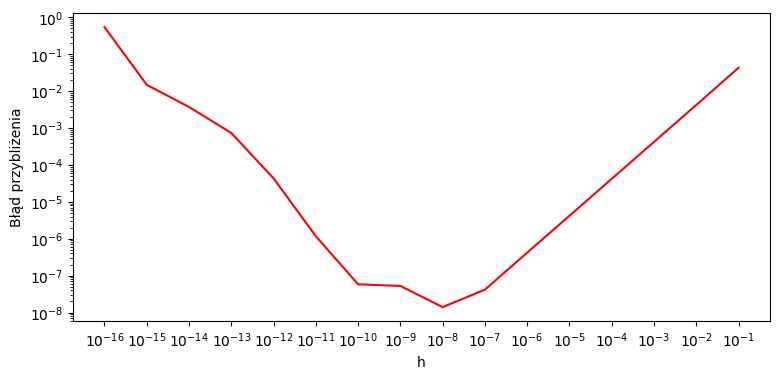

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(h, errors, color="red")
ax.set_xlabel("h")
ax.set_ylabel("Błąd przybliżenia")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xticks(h)
plt.show()

Odpowiedź: Jak widać najlepszy błąd przybliżenia uzyskujemy dla $h = 10^{-8}$

## Zadanie 6 (* 2 pkt)
Niech $f(x)=\cos (x)-1=-2\sin^2(\frac{x}{2})$. Oblicz wartość podanej funkcji stosując oba podane wzory dla $1000$ wartości $x$ równomiernie rozlożonych w $ (-10^{-7},10^{-7})$ i zilustruj otrzymane wyniki na wykresie. 

Który wzór wydaje się lepszy? Spróbuj wyjaśnić, dlaczego tak jest.

Oba wykresy powinny być narysowane w jednym oknie i rozróżnialne (poprzez zastosowanie różnych kolorów lub stylów linii). Ponadto, proszę umieścić przy wykresach legendę.

In [30]:
x = np.linspace(-1e-7, 1e-7, int(1e3))
f_1 = lambda x: np.cos(x) - 1
f_2 = lambda x: -2 * np.sin(x/2)**2

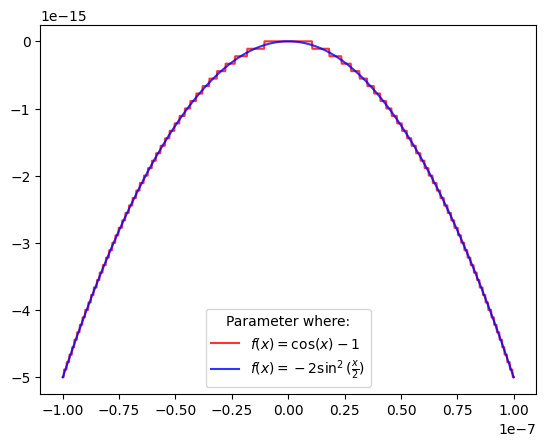

In [31]:
fig, ax = plt.subplots()
ax.plot(x, f_1(x), color="red", alpha=0.8, label=r"$f(x)=\cos (x)-1$")
ax.plot(x, f_2(x), color="blue", alpha=0.8, label=r"$f(x)=-2\sin^2(\frac{x}{2})$")
plt.legend(title='Parameter where:')
plt.show()

### Zadanie 7 (* 2 pkt)

Rozważmy wielomian $w(x)=(x-1)^4=x^4-4x^3+6x^2-4x+1$. 

Oblicz stosując oba podane wzory wartość tego wielomianu dla $100$ wartości $x$ równomiernie rozłożonych w przedziale $(0.9999,1.0001)$ i zilustruj otrzymane wyniki na wykresie. 

Który wzór wydaje się lepszy? Spróbuj wyjaśnić, dlaczego tak jest.

Oba wykresy powinny być narysowane w jednym oknie i rozróżnialne (poprzez zastosowanie różnych kolorów lub stylów linii). Ponadto, proszę umieścić przy wykresach legendę.

In [32]:
x = np.linspace(0.9999, 1.0001, 100)
w_1 = lambda x: (x-1)**4
w_2 = lambda x: x**4 - 4*x**3 + 6*x**2 - 4*x + 1

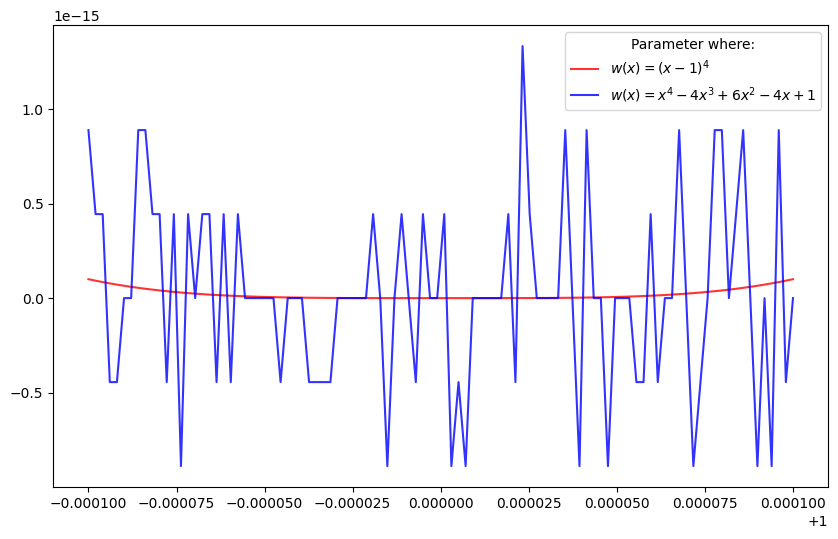

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, w_1(x), color="red", alpha=0.8, label=r"$w(x)=(x-1)^4$")
ax.plot(x, w_2(x), color="blue", alpha=0.8, label=r"$w(x)=x^4-4x^3+6x^2-4x+1$")
plt.legend(title='Parameter where:')
plt.show()

Odpowiedź: Przy postaci ogólnej wielomianu dokonujemy wielu operacji dodawania/odejmowania bliskich sobie liczb co powoduje narastanie błędu poprzez kolejne utraty liczb znaczących, natomiast w postaci iloczynowej odejmowania dokonujemy tylko raz co powoduje relatywnie 
 mniejszy błąd, stąd wzór w postaci iloczynowej zdaje się być lepszy do obliczania w postaci zmiennoprzecinkowej.

# Algorytm Hornera
Zauważmy, że wielomian o naturalnej postaci:
$$w(x)=\sum_{i=0}^na_ix^i$$
można także zapisać jako:
$$w(x)=(\ldots((a_nx+a_{n-1})x+a_{n-2})x+\ldots+a_1)x+a_0.$$
Z postaci tej wynika sposób obliczania wartości wielomianu w punkcie zwany algorytmem Hornera. Załóżmy, że chcemy obliczyć wartość wielomianu $w(x)$ w punkcie $x_0$. Definiujemy:
\begin{eqnarray}
	w_n&=&a_n,\nonumber\\
	w_i&=&w_{i+1}x_0+a_i,\; \text{dla}\;i=n-1,n-2,\ldots,0\nonumber
\end{eqnarray}
Wtedy $w(x_0)=w_0$. Obliczając wartość wielomianu w punkcie w ten sposób ograniczamy liczbę mnożeń. Stosując algorytm Hornera możemy także obliczyć wynik dzielenia wielomianu $w(x)$ przez dwumian $x-c$. Jeśli bowiem
$$\sum_{i=0}^na_ix^i=(\sum_{i=0}^{n-1}b_{i+1}x^i)(x-c)+b_0,$$
to porównując współczynniki przy odpowiednich potęgach otrzymujemy zależność $a_i=b_i-b_{i+1}c$ dla $i=0,\ldots,n-1$ i $a_n=b_n$. Oznacza to, że $b_i=w_i$ dla $i=0,\ldots,n$.

Kolejnym zastosowaniem algorytmu Hornera jest obliczanie wartości pochodnych znormalizowanych w punkcie $x_0$, tzn. wartości:
$$\frac{w^{(j)}(x_0)}{j!} \text{ dla } j=0,1,\ldots,n.$$
Zapiszmy wielomian $w(x)$ w postaci:
$$w(x)=(x-x_0)^jv(x)+r(x),$$
gdzie $r(x)$ jest wielomianem o stopniu mniejszym od $j$. Różniczkując to wyrażenie $j$ razy i obliczając jego wartość w punkcie $x_0$ otrzymujemy równość:
$$w^{(j)}(x_0)=j!v(x_0).$$

Zatem chcąc obliczyć wartość $j$-tej pochodnej znormalizowanej wielomianu wystarczy zastosować algorytm Hornera $j$ razy, żeby podzielić kolejno otrzymywane ilorazy przez $x-x_0$, a następnie obliczyć wartość otrzymanego wielomianu w punkcie $x_0$.

Ostatnim omawianym zastosowaniem algorytmu Hornera będzie zamiana liczby zapisanej w systemie pozycyjnym o podstawie $p$ ($p\neq 10$) na zapis w systemie dziesiętnym. Rozważmy liczbę zapisaną w systemie pozycyjnym o podstawie $p$:
$$c_nc_{n-1}\ldots c_1c_0 \;_{(p)}=c_np^n+c_{n-1}p^{n-1}+\ldots+c_1p+c_0.$$
Zatem chcąc obliczyć wartość tej liczby w systemie dziesiętnym wystarczy obliczyć wartość wielomianu $w(x)=\sum_{i=0}^nc_ix^i$ w punkcie $p$.

Wielomian możemy też zapisać w tzw. postaci Newtona:
\begin{align*}
	w(x)= \sum_{k=0}^n b_k\prod_{j=0}^{k-1}(x-x_j)=b_0+b_1(x-x_0)+b_2(x-x_0)(x-x_1)+\ldots+b_n(x-x_0)\cdot\ldots\cdot (x-x_{n-1})
\end{align*}
Mając dany wielomian w tej postaci możemy w łatwy sposób obliczyć jego wartość w punkcie $s$ korzystając z uogólnionego schematu Hornera:
\begin{eqnarray*}
	p_n&=&b_n\\
	p_i&=&p_{i+1}( s-x_i)+b_i, \text{ dla }i=n-1,n-2,\ldots,0
\end{eqnarray*}


In [34]:
from numpy.polynomial import polynomial as P

### Zadanie 1
 Stosując polecenie `horner` (w numpy `np.polynomial.polynomial.polyval`) oblicz wartość wielomianu $w(x)$ w punkcie $x_0$ dla:	
1. $w(x)=x^3-2x^2+3x-4$, $x_0=1$,
2. $w(x)=8x^3+5x^2+3x+1$, $x_0=-3$.

In [35]:
# 1.
x0 = 1
c = np.array([-4, 3, -2, 1])
P.polyval(x0, c)

-2.0

In [36]:
# 2.
x0 = -3
c = np.array([1, 3, 5, 8])
P.polyval(x0, c)

-179.0

### Zadanie 2.
Stosując polecenie `pdiv` (w numpy `np.polynomial.polynomial.polydiv`) wyznacz wielomian będacy wynikiem dzielenia wielomianu $w(x)$ przez dwumian $d(x)$:
1. $w(x)=2x^3+5x^2-4x+11$, $d(x)=x-2$,
2. $w(x)=x^4-9x^2+3x-5$, $d(x)=x+7$.


In [37]:
# 1.
w = (11, -4, 5, 2)
d = (-2, 1)
q, r = P.polydiv(w, d)
q, r

(array([14.,  9.,  2.]), array([39.]))

1. $q(x) = 2x^2 + 9x + 14$, $r(x) = 39$

In [38]:
# 2.
w = (-5, 3, -9, 1)
d = (7, 1)
q, r = P.polydiv(w, d)
q, r

(array([115., -16.,   1.]), array([-810.]))

2. $q(x) = x^2 - 16x + 115$, $r(x) = x + 7$

### Zadanie 3.
Używając poleceń `horner` i `pdiv` (w numpy `np.polynomial.polynomial.polyval` i `np.polynomial.polynomial.polyval`), znajdź wszystkie pochodne znormalizowane  wielomianu $w(x)$ w punkcie $x_0$:
1. $w(x)=x^3+2x^2+4x+8$, $x_0=-2$,
2. $w(x)=x^4-x^3+3x-1$, $x_0=2$

In [39]:
# 1.
x_0 = -2
w = (8, 4, 2, 1)
ds = [
    (-x_0, 1), 
    (4, 4, 1), # (x-x0)^2
    (8, 12, 6, 1), # (x-x0)^3
]
polynomials = [w]
for d in ds:
    v, _ = P.polydiv(w, d)
    polynomials.append(v)

In [40]:
import math

normalized_derivative = lambda v, j, x_0: math.factorial(j)*P.polyval(x_0, v)

In [41]:
for derivative_order, v in enumerate(polynomials):
    print(f"Derivative value at x_0 = {x_0} of order {derivative_order} equals {normalized_derivative(v, derivative_order, x_0)}")

Derivative value at x_0 = -2 of order 0 equals 0.0
Derivative value at x_0 = -2 of order 1 equals 8.0
Derivative value at x_0 = -2 of order 2 equals -8.0
Derivative value at x_0 = -2 of order 3 equals 6.0


In [42]:
# Lets find derivatives analyticaly 
import sympy as sp

x = sp.symbols('x')
w = x**3 + 2*x**2 + 4*x + 8
w_1 = w.diff(x)
w_1

3*x**2 + 4*x + 4

In [43]:
w_1.subs({x: x_0})

8

In [44]:
w_2 = w.diff(x, 2)
w_2

2*(3*x + 2)

In [45]:
w_2.subs({x: x_0})

-8

In [46]:
w_3 = w.diff(x, 3)
w_3

6

In [47]:
w_3.subs({x: x_0})

6

Wygląda na to, że policzyliśmy poprawnie!

In [48]:
# 2.
x_0 = 2
w = (-1, 3, 0, -1, 1)
ds = [
    (-x_0, 1),
    (4, -4, 1), # (x-x0)^2
    (-8, 12, -6, 1), # (x-x0)^3
    (16, -32, 24, -8, 1), # (x-x0)^4
]
polynomials = [w]
for d in ds:
    v, _ = P.polydiv(w, d)
    polynomials.append(v)

In [49]:
# Jako, że zdefiniowaliśmy już funkcję na znormalizowaną pochodną to możemy jej teraz użyć
for derivative_order, v in enumerate(polynomials):
    print(f"Derivative value at x_0 = {x_0} of order {derivative_order} equals {normalized_derivative(v, derivative_order, x_0)}")

Derivative value at x_0 = 2 of order 0 equals 13.0
Derivative value at x_0 = 2 of order 1 equals 23.0
Derivative value at x_0 = 2 of order 2 equals 36.0
Derivative value at x_0 = 2 of order 3 equals 42.0
Derivative value at x_0 = 2 of order 4 equals 24.0


In [50]:
x = sp.symbols('x')
w = x**4 - x**3 + 3*x - 1
w_1 = w.diff(x)
w_1, w_1.subs({x: x_0})

(4*x**3 - 3*x**2 + 3, 23)

In [51]:
w_2 = w.diff(x, 2)
w_2, w_2.subs({x: x_0})

(6*x*(2*x - 1), 36)

In [52]:
w_3 = w.diff(x, 3)
w_3, w_3.subs({x: x_0})

(6*(4*x - 1), 42)

In [53]:
w_4 = w.diff(x, 4)
w_4, w_4.subs({x: x_0})

(24, 24)

Wygląda na to, że policzyliśmy poprawnie!

### Zadanie 4 (* 3 pkt)
Napisz funkcję, która dla danej liczby $p$ ($2\leq p \leq 9$) i liczby zapisanej w systemie pozycyjnym o podstawie $p$ oblicza jej wartość w systemie dziesiętnym wykorzystując algorytm Hornera.  Zakładamy, że dane wejściowe do funkcji są podane w postaci pary $(c,p)$, gdzie $p$ jest liczbą naturalną z zakresu od $2$ do $9$, a $c$ jest wektorem kolejnych cyfr w zapisie pozycyjnym danej liczby, przy czym pierwsza współrzędna odpowiada współczynnikowi przy potędze liczby $p$ o wykładniku $0$.  

Przetestuj tę funkcję na poniższych przykładach:

1. $([5,4,3,2,1],6)$,
2. $([8,5,3,2,1,1],9)$,
3. $([0,1,0,1,1,0,1],2)$.

Uwaga! Proszę nie używać wbudowanej funkcji `horner` (w numpy `np.polynomial.polynomial.polyval`).

In [54]:
def eval_positional_notation(c, p):
    value = c[-1]
    for c_i in reversed(c[:-1]):
        value = value * p + c_i
    return value

In [55]:
# 1.
c = np.array([5,4,3,2,1])
p = 6

eval_positional_notation(c, p)

1865

In [56]:
eval_positional_notation(c, p) == P.polyval(p, c)

True

In [57]:
# 2.
c = np.array([8,5,3,2,1,1])
p = 9
eval_positional_notation(c, p)

67364

In [58]:
eval_positional_notation(c, p) == P.polyval(p, c)

True

In [59]:
# 3. 
c = np.array([0,1,0,1,1,0,1])
p = 2
eval_positional_notation(c, p)

90

In [60]:
eval_positional_notation(c, p) == P.polyval(p, c)

True

### Zadanie 5 (* 4 pkt) 
Napisz funkcję, która korzystając z uogólnionego schematu Hornera dla wektora $n$ różnych punktów $x=[x_0,x_1,\ldots,x_{n-1}]$, wektora $b=[b_0,b_1,\ldots,b_n]$  współczynników wielomianu wielomianu $w$ danego w postaci Newtona i wektora punktów $s=[s_1,s_2,\ldots,s_k]$ zwraca wektor wartości tego wielomianu interpolacyjnego w punktach $s_1,s_2,\ldots,s_k$. 

Przetestuj tę funkcję dla następujących danych:
1. $x=[2,4,6,8,10]$, $b=[-1,1,2,3,-4,1]$, $s=[3,5,7,9]$,
2. $x=[0,0,-1,-1,-1,-2]$, $b=[3,-3,3,-3,2,0,2]$, $s=[-1,-2,0,-1.5,-2.75,5]$.

In [61]:
def generalized_horner_scheme(x, b, s):
    value = b[-1]
    for b_i, x_i in zip(reversed(b[:-1]), reversed(x)):
        value = value * (s - x_i) + b_i
    return value

In [62]:
# 1.
x = [2, 4, 6, 8, 10]
b = [-1, 1, 2, 3, -4, 1]
s = np.array([3, 5, 7, 9])

generalized_horner_scheme(x, b, s)

array([ 172,  -82,  184, -134])

In [63]:
# 2.
x = [0, 0, -1, -1, -1, -2]
b = [3, -3, 3, -3, 2, 0, 2]
s = np.array([-1, -2, 0, -1.5, -2.75, 5])

generalized_horner_scheme(x, b, s)

array([9.00000000e+00, 4.10000000e+01, 3.00000000e+00, 1.84687500e+01,
       1.80756348e+02, 7.70130000e+04])